# Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [49]:
df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [50]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
df.shape

(5110, 12)

In [52]:
df = df.drop('id', axis=1)

In [53]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [55]:
columns = df.columns

In [56]:
columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [57]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


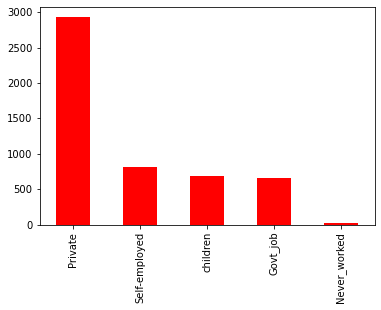

In [59]:
df['work_type'].value_counts().plot(kind='bar', color='red')

In [60]:
# 'unknown' is missing value in the dataset
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [61]:
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

# Filling missing values

In [62]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace = True)

In [63]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [64]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          3
stroke                  2
dtype: int64

# Label Encoding

In [65]:
continuous_data_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
categorical_data_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

In [66]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [67]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

gender ['Female' 'Male' 'Other']
age [8.00e-02 1.60e-01 2.40e-01 3.20e-01 4.00e-01 4.80e-01 5.60e-01 6.40e-01
 7.20e-01 8.00e-01 8.80e-01 1.00e+00 1.08e+00 1.16e+00 1.24e+00 1.32e+00
 1.40e+00 1.48e+00 1.56e+00 1.64e+00 1.72e+00 1.80e+00 1.88e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01
 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01
 1.90e+01 2.00e+01 2.10e+01 2.20e+01 2.30e+01 2.40e+01 2.50e+01 2.60e+01
 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01 3.40e+01
 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01
 4.30e+01 4.40e+01 4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01
 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01 5.60e+01 5.70e+01 5.80e+01
 5.90e+01 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.60e+01
 6.70e+01 6.80e+01 6.90e+01 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01
 7.50e+01 7.60e+01 7.70e+01 7.80e+01 7.90e+01 8.00e+01 8.10e+01 8.20e+01]
hypertension 

In [68]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


# Correlation Matrix

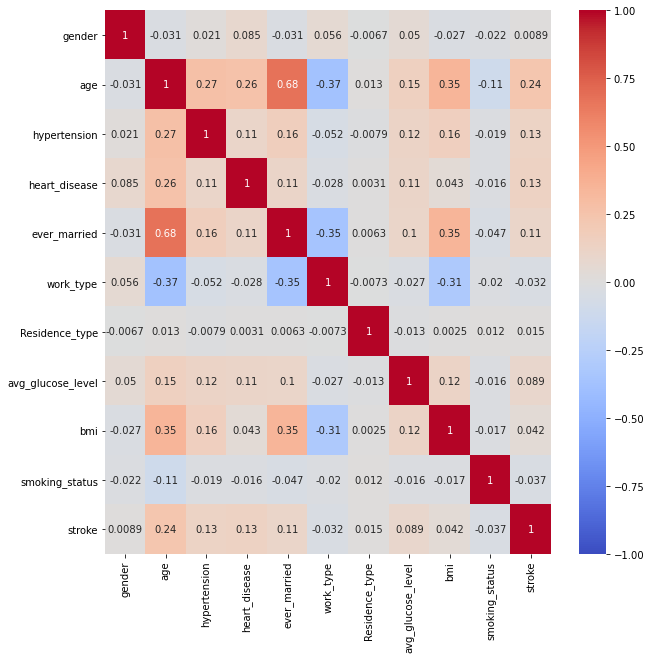

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

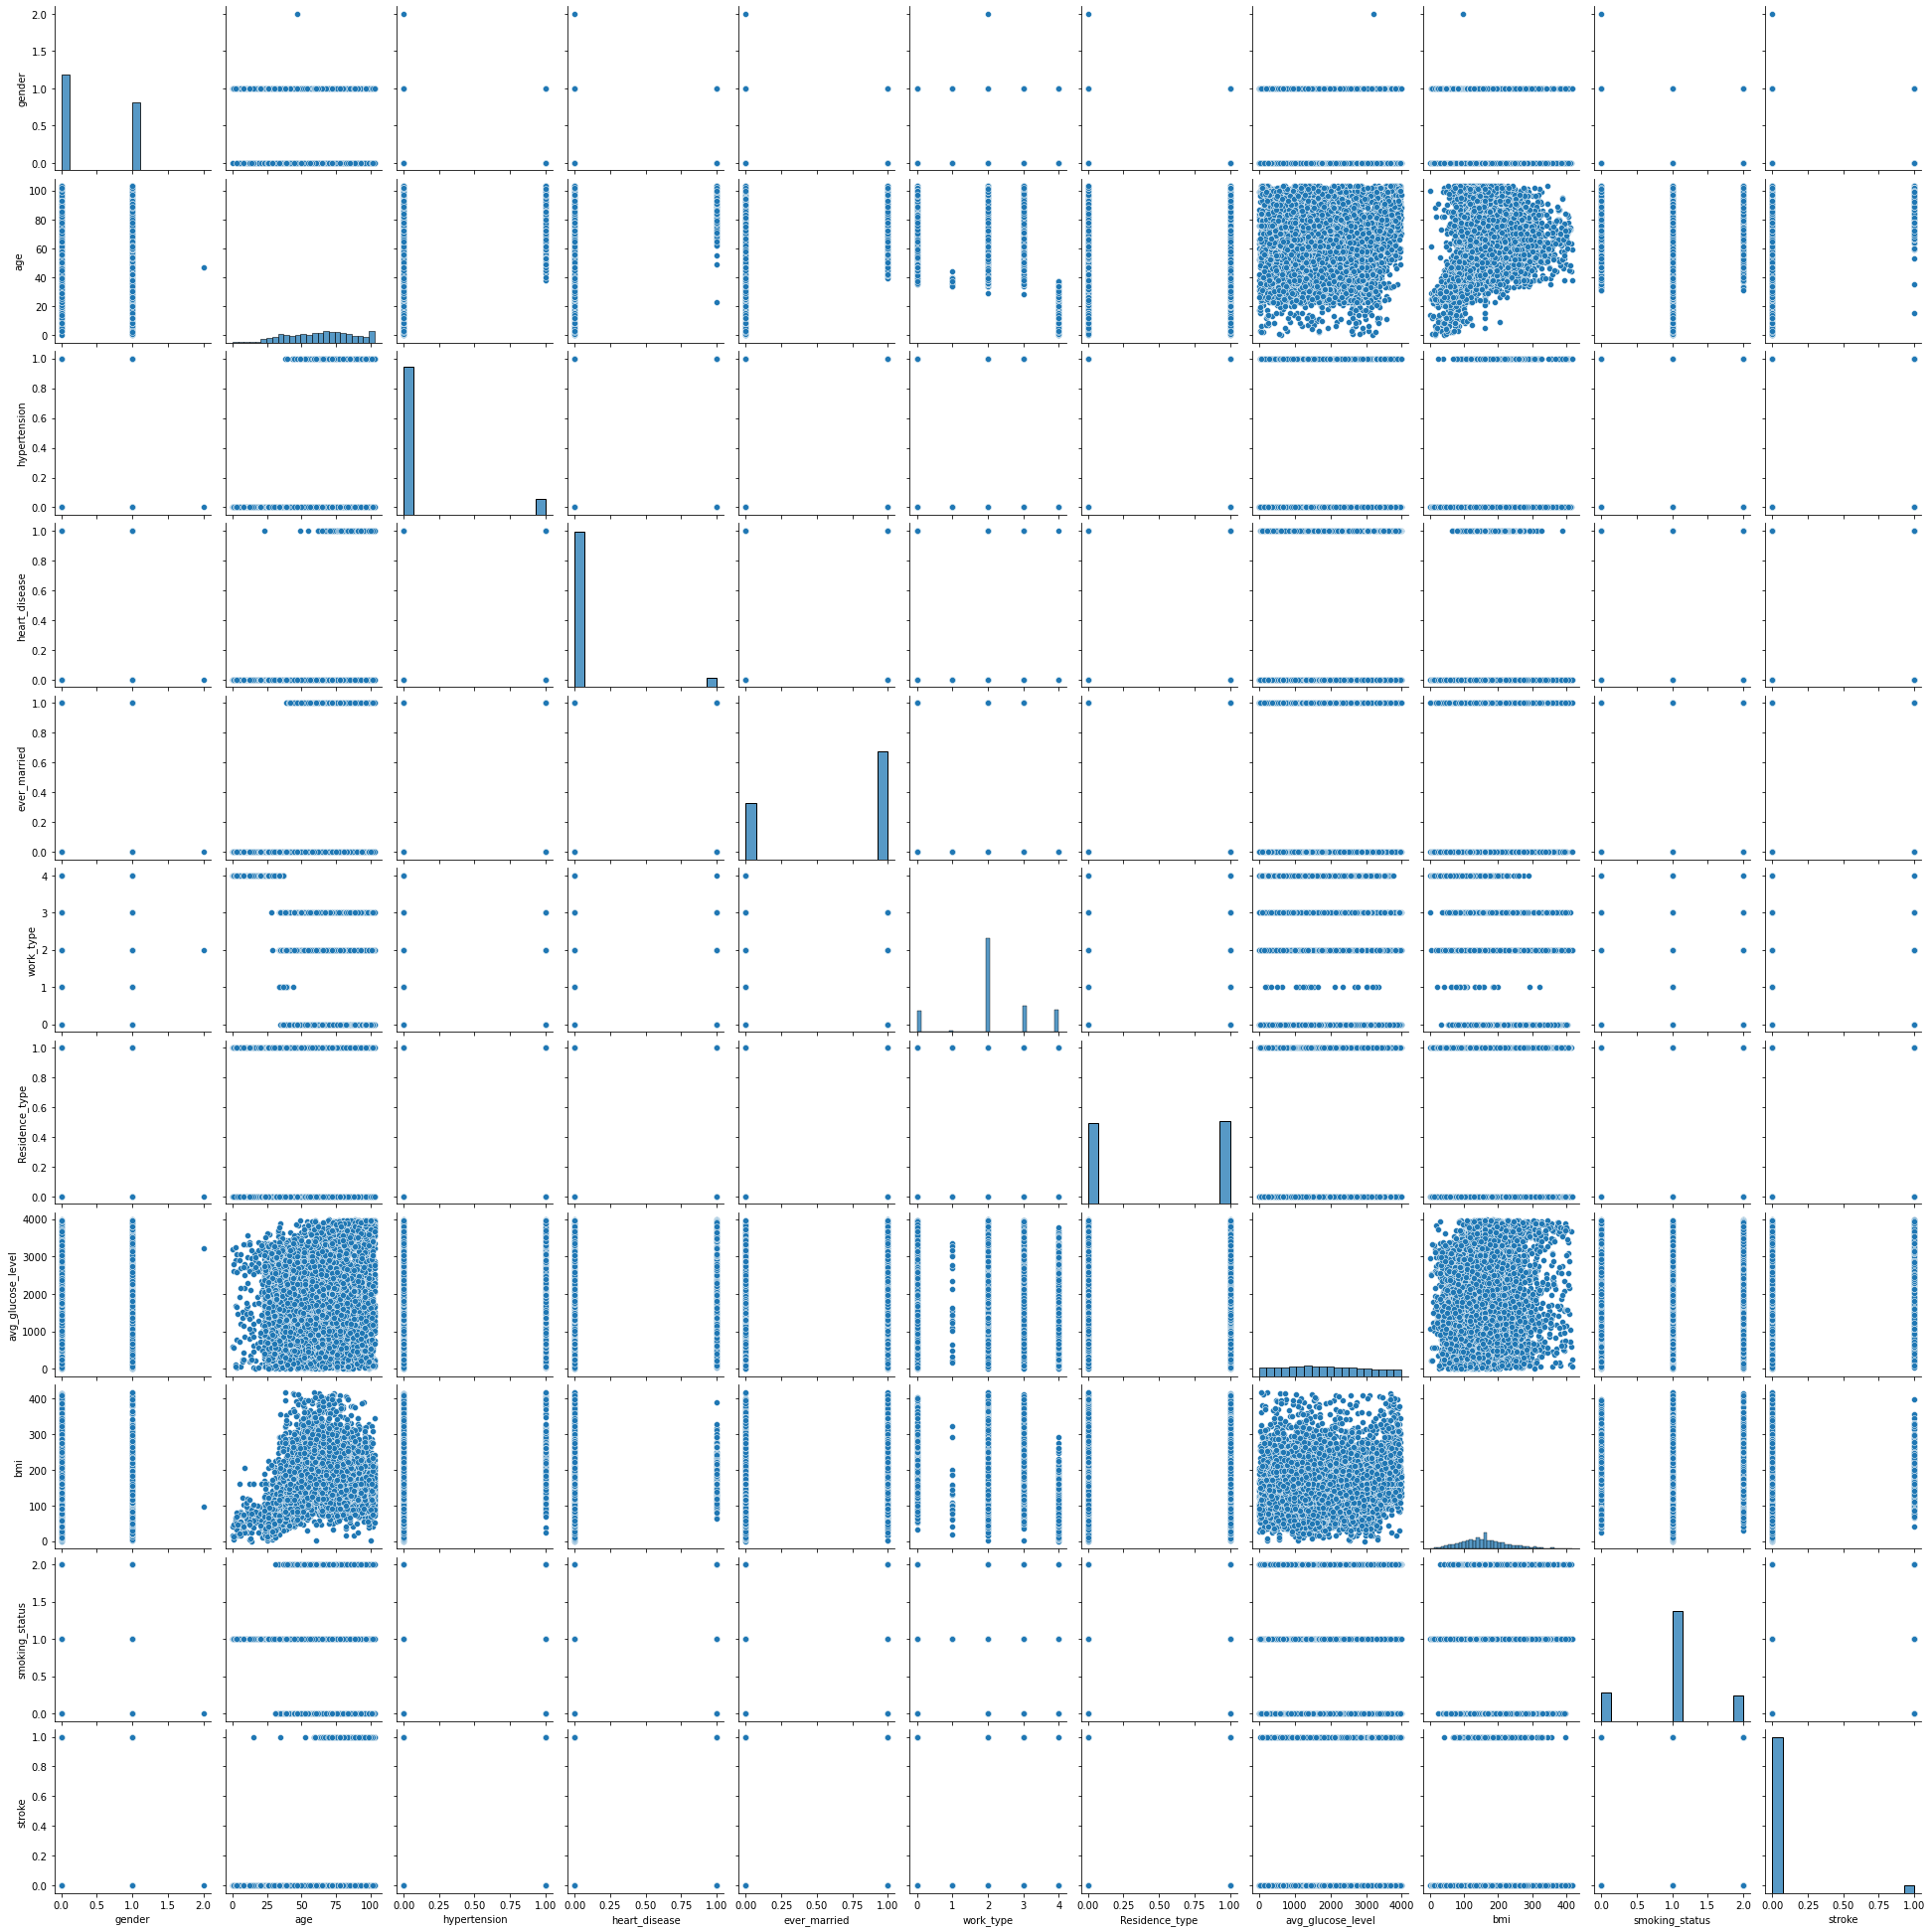

In [70]:
sns.pairplot(df)

# Training and Testing Data

In [71]:
X = df.drop(['stroke'],axis =1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,0
1,0,82,0,0,1,3,0,3588,162,1
2,1,101,0,1,1,2,0,2483,199,1
3,0,70,0,0,1,2,1,3385,218,2
4,0,100,1,0,1,3,0,3394,113,1


In [72]:
y = df['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
model=[]
accuracy=[]
f1score=[]
cross_val = []

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9483568075117371

In [84]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator= lr, X = X_train,y = y_train, cv=5).mean()

0.9522445116948812

In [85]:
from sklearn.metrics import f1_score
y_pred = lr.predict(X_test)
f1_score(y_test,y_pred)

0.0

In [86]:
accuracy.append(lr.score(X_test,y_test))
f1score.append(f1_score(y_test,y_pred))
cross_val.append(cross_val_score(estimator= lr, X = X_train,y = y_train, cv=5).mean())
model.append('Logistic Regression')

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9475743348982786

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean()

0.9509400499045142

In [89]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test,y_pred)

0.028985507246376812

In [90]:
accuracy.append(clf.score(X_test,y_test))
f1score.append(f1_score(y_test,y_pred))
cross_val.append(cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean())
model.append('Random Forest')

# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8685446009389671

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean()

0.9517233397217467

In [92]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test,y_pred)

0.028985507246376812

In [93]:
accuracy.append(clf.score(X_test,y_test))
f1score.append(f1_score(y_test,y_pred))
cross_val.append(cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean())
model.append('Naive Bayes')

# Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9076682316118936

In [95]:
cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean()

0.914664642345308

In [96]:
y_pred = clf.predict(X_test)
f1_score(y_test,y_pred)

0.13235294117647056

In [97]:
accuracy.append(clf.score(X_test,y_test))
f1score.append(f1_score(y_test,y_pred))
cross_val.append(cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean())
model.append('Decision Tree Classifier')

# SVM

In [98]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9483568075117371

In [99]:
cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean()

0.9522445116948812

In [100]:
y_pred = clf.predict(X_test)
f1_score(y_test,y_pred)

0.0

In [101]:
accuracy.append(clf.score(X_test,y_test))
f1score.append(f1_score(y_test,y_pred))
cross_val.append(cross_val_score(estimator= clf, X = X_train,y = y_train, cv=5).mean())
model.append('Support Vector Machine')

In [102]:
model

['Logistic Regression',
 'Random Forest',
 'Naive Bayes',
 'Decision Tree Classifier',
 'Support Vector Machine']

In [103]:
accuracy

[0.9483568075117371,
 0.9475743348982786,
 0.9475743348982786,
 0.9076682316118936,
 0.9483568075117371]

In [104]:
f1score

[0.0, 0.028985507246376812, 0.028985507246376812, 0.13235294117647056, 0.0]

In [105]:
cross_val

[0.9522445116948812,
 0.9512011465102583,
 0.9512008060974738,
 0.914664642345308,
 0.9522445116948812]